# TASK 2: 

# Movie Recommendation System

dataset:https://github.com/info-aidtech/Movie-Recommendation-System-Dataset/blob/main/movies.csv

Steps to create the project:

Load the MovieLens dataset into your Python environment. You can use a library like Pandas to load the dataset.

Pre-process the dataset by cleaning the data, removing duplicates and missing values, and converting the data into a matrix format.

Split the dataset into training and testing sets.

Implement a collaborative filtering algorithm to train your model. Collaborative filtering is a technique that recommends movies to users based on their ratings and the ratings of similar users.

Train your model using the training set.

Evaluate your model's performance on the testing set using metrics like Mean Absolute Error or Root Mean Squared Error.

Use your model to make movie recommendations for users based on their preferences.

Test your model by inputting new user ratings to see the recommended movies. 

In [18]:
import pandas as pd

# Load the movies dataset
movies = pd.read_csv("C:\\Users\\Narthana\\Downloads\\movies.csv")


movieId    0
title      0
genres     0
dtype: int64


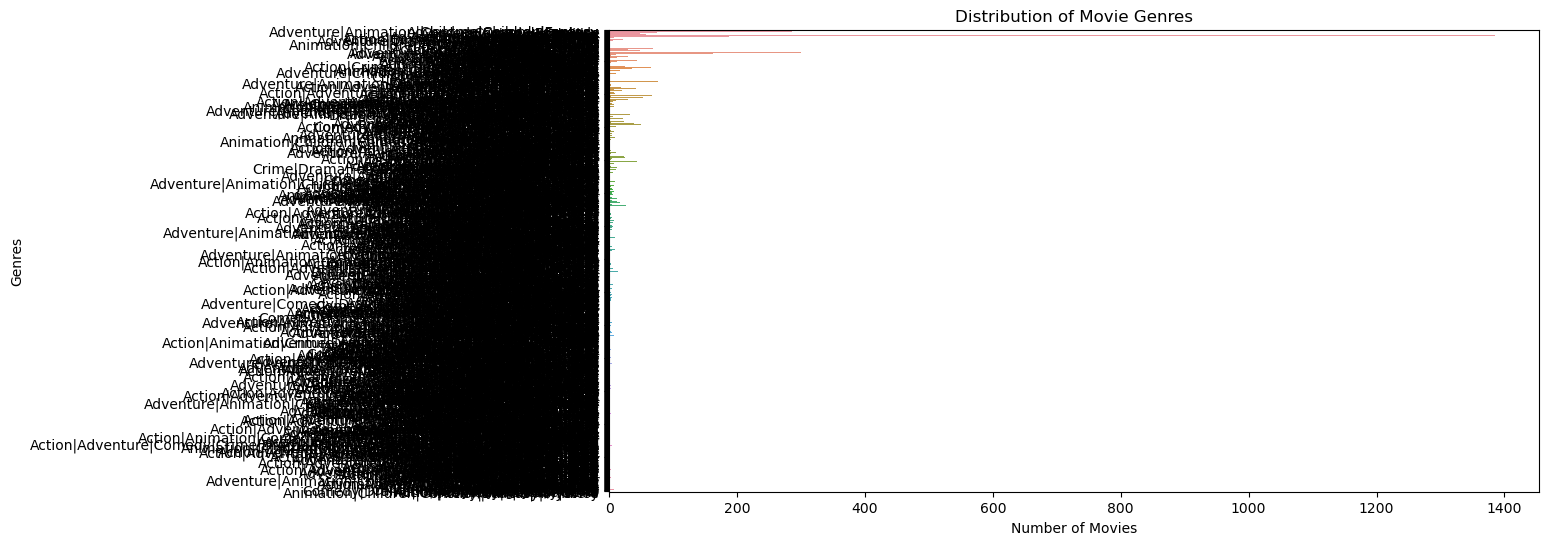

In [19]:
# Remove duplicates
movies.drop_duplicates(inplace=True)

# Check for missing values
missing_values = movies.isnull().sum()
print(missing_values)

# Visualize movie genres distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=movies, y='genres')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()


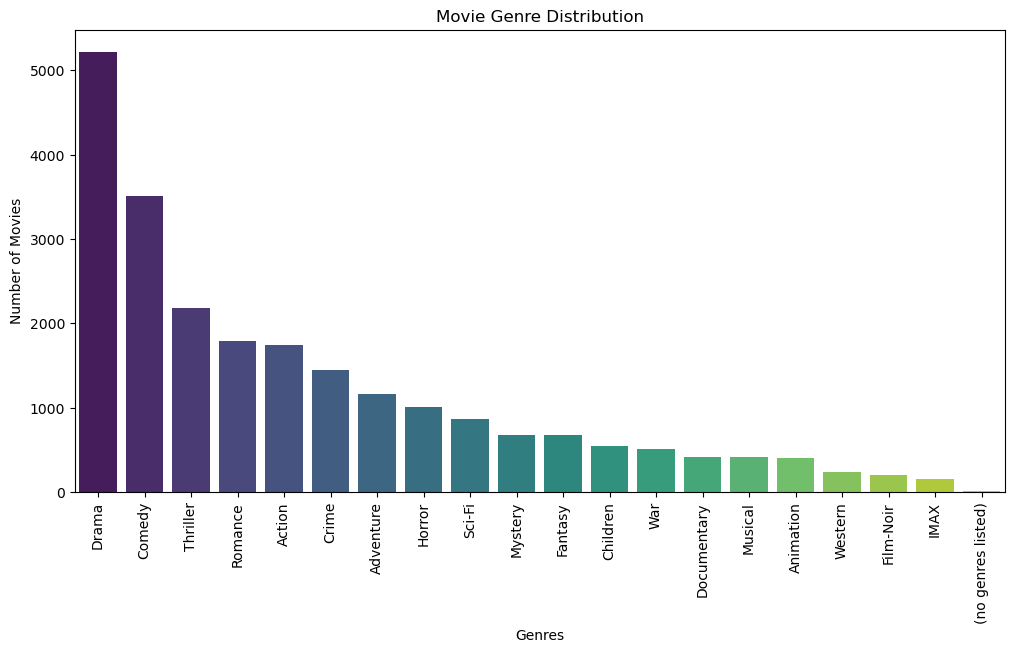

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrence of each genre
genre_counts = movies['genres'].str.split('|').explode().value_counts()

# Create a bar chart for genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Movie Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.show()


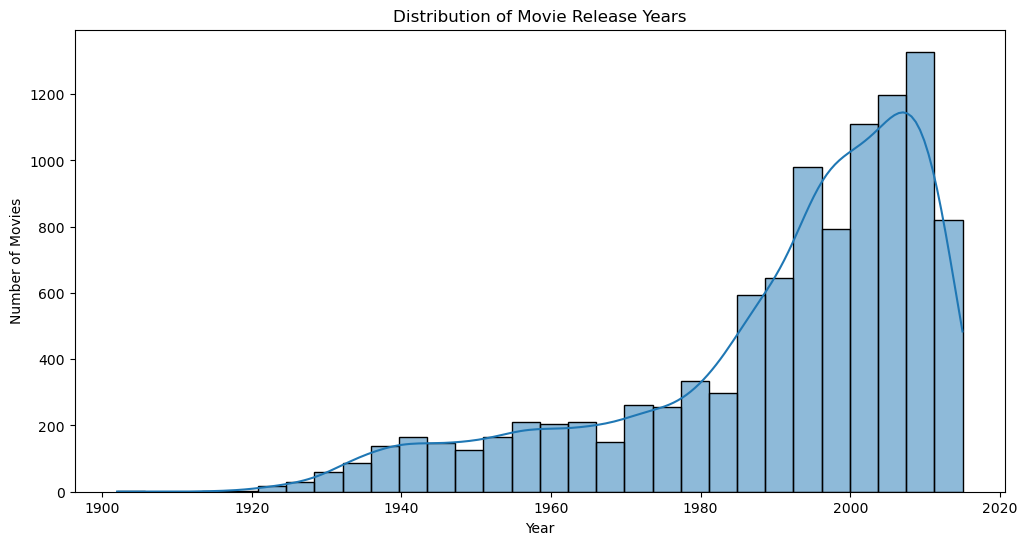

In [21]:
# Visualize the number of movies released each year
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = movies['year'].astype(float)

plt.figure(figsize=(12, 6))
sns.histplot(movies['year'], bins=30, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


In [22]:
# Extract year from title and create a 'year' column
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = pd.to_numeric(movies['year'], errors='coerce')


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine relevant features (genres in this case)
movies['features'] = movies['genres'] + ' ' + movies['year'].astype(str)

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['features'])


In [24]:
from sklearn.metrics.pairwise import linear_kernel

# Compute similarity scores
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def get_recommendations(title):
    idx = movies.loc[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar movies
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

# Get recommendations for a movie
recommended_movies = get_recommendations('Toy Story (1995)')
print(recommended_movies)


12                                           Balto (1995)
1                                          Jumanji (1995)
55                     Indian in the Cupboard, The (1995)
6471                            Magic in the Water (1995)
626                Wallace & Gromit: A Close Shave (1995)
228                  Kid in King Arthur's Court, A (1995)
4993                 Ninja Scroll (Jûbei ninpûchô) (1995)
214                                          Gordy (1995)
210                                 Goofy Movie, A (1995)
712     Land Before Time III: The Time of the Great Gi...
Name: title, dtype: object


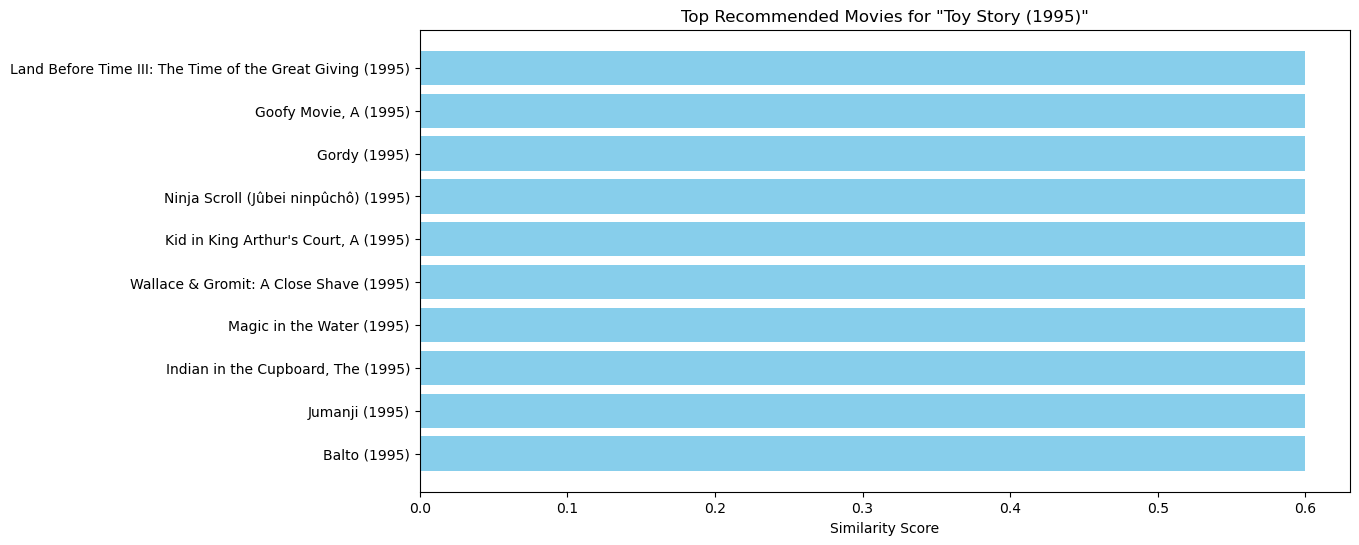

In [25]:
# Visualize the recommended movies
plt.figure(figsize=(12, 6))
plt.barh(recommended_movies[::-1], width=0.6, color='skyblue')
plt.xlabel('Similarity Score')
plt.title('Top Recommended Movies for "Toy Story (1995)"')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest similarity at the top
plt.show()

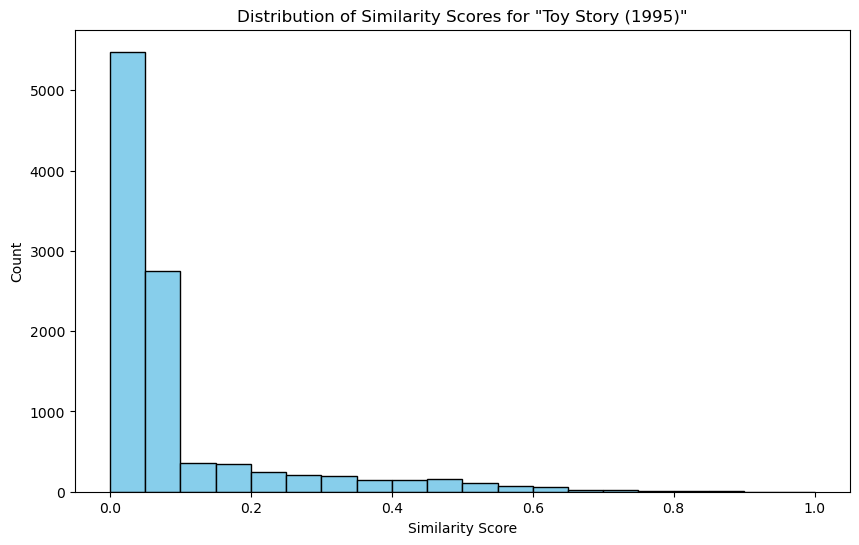

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Combine relevant features (genres in this case)
movies['features'] = movies['genres'] + ' ' + movies['year'].astype(str)

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['features'])

# Compute similarity scores
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get the similarity scores for a specific movie (e.g., "Toy Story (1995)")
movie_title = "Toy Story (1995)"
idx = movies.loc[movies['title'] == movie_title].index[0]
similarity_scores = cosine_sim[idx]

# Visualize the distribution of similarity scores
plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=20, edgecolor='k', color='skyblue')
plt.title('Distribution of Similarity Scores for "{}"'.format(movie_title))
plt.xlabel('Similarity Score')
plt.ylabel('Count')
plt.show()


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine relevant features (genres and year in this case)
movies['features'] = movies['genres'] + ' ' + movies['year'].astype(str)

# Apply TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['features'])


In [28]:
from sklearn.metrics.pairwise import linear_kernel

# Compute similarity scores
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_user_recommendations(user_preferences, num_recommendations=10):
    # Combine user preferences into a single string
    user_input = ' '.join(user_preferences)
    
    # Create a new dataframe with the user input as a movie
    user_movie = pd.DataFrame({'title': ['User Input'], 'features': [user_input]})
    
    # Add the user's movie to the original movies dataset
    movies_with_user = pd.concat([movies, user_movie])
    
    # Apply TF-IDF vectorization to the updated dataset
    tfidf_matrix_with_user = tfidf_vectorizer.transform(movies_with_user['features'])
    
    # Compute similarity scores with the user's movie
    cosine_sim_with_user = linear_kernel(tfidf_matrix_with_user, tfidf_matrix_with_user)
    
    # Get the index of the user's movie
    user_movie_index = len(movies)  # The index of the user's movie in the concatenated dataset
    
    # Get the similarity scores for the user's movie
    sim_scores = list(enumerate(cosine_sim_with_user[user_movie_index]))
    
    # Sort the movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top similar movies
    movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]
    
    # Get the titles of the recommended movies
    recommended_movies = movies['title'].iloc[movie_indices]
    
    return recommended_movies

# Example usage:
user_preferences = ['Adventure', 'Animation', 'Children']
recommended_movies = get_user_recommendations(user_preferences)
print("Recommended Movies:")
print(recommended_movies)


Recommended Movies:
8120                         Up (2009)
12                        Balto (1995)
2860                   Dinosaur (2000)
3104         Digimon: The Movie (2000)
5016               Brother Bear (2003)
7650        Horton Hears a Who! (2008)
6941    Ice Age 2: The Meltdown (2006)
7014             Over the Hedge (2006)
4032                    Ice Age (2002)
4175      Hey Arnold! The Movie (2002)
Name: title, dtype: object


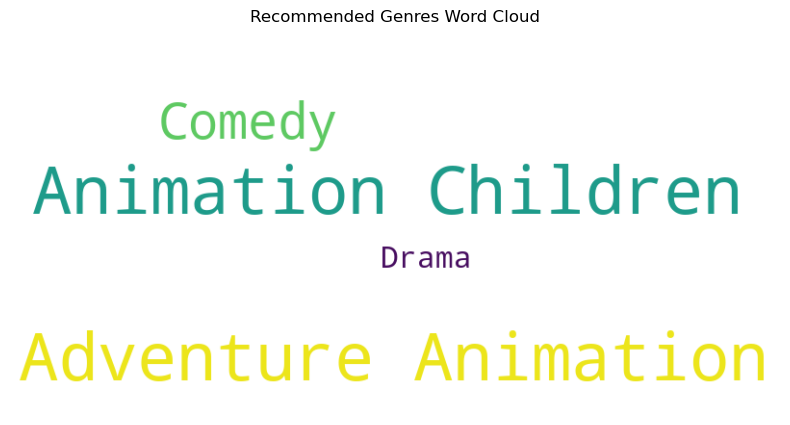

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example user preferences and recommendations
user_preferences = ['Adventure', 'Animation', 'Children']
recommended_movies = get_user_recommendations(user_preferences)

# Create a word cloud for recommended genres
recommended_genres = ' '.join(' '.join(movies[movies['title'] == movie]['genres'].values[0].split('|')) for movie in recommended_movies)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(recommended_genres)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Recommended Genres Word Cloud')
plt.show()
